In [28]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.integrate import odeint
# import panel as pn
# from bokeh.plotting import figure, output_notebook, show
# import colorcet
# colors = colorcet.b_glasbey_category10
# pn.extension()

# output_notebook()
# # X signals
# def X_signal(t, duration):
#     return 1.0 if 10 <= t <= duration else 0.0

# # Y signals
# def Y_signal(t, duration):
#     if t < 0:
#         return -1
#     if  0 <= t < duration:
#         return 1
#     else:
#         return 0  
#     # return -1

# # define regulaiton funcitons
# def reg(u, k, h, pattern):
#     '''
#     u: input signal
#     k: regulation coeficient
#     h: hill coefficient
#     pattern: 'activation' or 'repression' ==> '1' or '-1'
#     '''
#     if pattern == 1:
#         return (u/k)**h / (1 + (u/k)**h)
#     elif pattern == -1:
#         return 1 / (1 + (u/k)**h)
#     else:
#         raise ValueError('pattern must be 1 or -1')

# def kinetics(variables, t, duration, threshold_y, para):
#     Y, Z = variables
#     X = X_signal(t, duration)
#     Sy = Y_signal(t, duration)
#     by, kxy, ay, bz, kxz, kyz, az, h, type = para

#     if type == 1:
#         dY = by * reg(X, kxy, h, 1) - ay * Y if (Sy == 1 or Sy == 0) else 0
#         # dY = by * reg(X, kxy, h, 1) - ay * Y
#         if Y >= threshold_y:
#             dZ = bz * reg(X, kxz, h, 1) * reg(Y, kyz, h, 1) - az * Z
#         elif Y <= threshold_y and Z >= 0:
#             dZ =  - az * Z
#         else:
#             dZ = 0

#     if type == 2:
#         dY = by * reg(X, kxy, h, -1) - ay * Y if (Sy == 1 or Sy == 0) else 0
#         if Y >= threshold_y:
#             dZ = bz * reg(X, kxz, h, -1) * reg(Y, kyz, h, 1) - az * Z
#         elif Y <= threshold_y and Z >= 0:
#             dZ = - az * Z
#         else:
#             dZ = 0
    
#     if type == 3:
#         dY = by * reg(X, kxy, h, 1) - ay * Y if (Sy == 1 or Sy == 0) else 0
#         if Y >= threshold_y:
#             dZ = bz * reg(X, kxz, h, -1) * reg(Y, kyz, h, -1) - az * Z
#         elif Y <= threshold_y and Z >= 0:
#             dZ = - az * Z
#         else:
#             dZ = 0

#     if type == 4:
#         dY = by * reg(X, kxy, h, -1) - ay * Y if (Sy == 1 or Sy == 0) else 0
#         if Y >= threshold_y:
#             dZ = bz * reg(X, kxz, h, 1) * reg(Y, kyz, h, -1) - az * Z
#         elif Y <= threshold_y and Z >= 0:
#             dZ = - az * Z
#         else:
#             dZ = 0
    
#     if type == 5:
#         dY = by * reg(X, kxy, h, 1) - ay * Y if (Sy == 1 or Sy == 0) else 0
#         if Y >= threshold_y:
#             dZ = bz * reg(X, kxz, h, 1) * reg(Y, kyz, h, -1) - az * Z
#         elif Y <= threshold_y and Z >= 0:
#             dZ = - az * Z
#         else:
#             dZ = 0
    
#     if type == 6:
#         dY = by * reg(X, kxy, h, -1) - ay * Y if (Sy == 1 or Sy == 0) else 0
#         if Y >= threshold_y:
#             dZ = bz * reg(X, kxz, h, -1) * reg(Y, kyz, h, -1) - az * Z
#         elif Y <= threshold_y and Z >= 0:
#             dZ = - az * Z
#         else:
#             dZ = 0
    
#     if type == 7:
#         dY = by * reg(X, kxy, h, 1) - ay * Y if (Sy == 1 or Sy == 0) else 0
#         if Y >= threshold_y:
#             dZ = bz * reg(X, kxz, h, -1) * reg(Y, kyz, h, 1) - az * Z
#         elif Y <= threshold_y and Z >= 0:
#             dZ = - az * Z
#         else:
#             dZ = 0
    
#     if type == 8:
#         dY = by * reg(X, kxy, h, -1) - ay * Y if (Sy == 1 or Sy == 0) else 0
#         if Y >= threshold_y:
#             dZ = bz * reg(X, kxz, h, 1) * reg(Y, kyz, h, 1) - az * Z
#         elif Y <= threshold_y and Z >= 0:
#             dZ = - az * Z
#         else:
#             dZ = 0

#     return [dY, dZ]

# def feedforward_loop_scipy(t_end, para, duration, threshold_y):
#     timesteps = np.linspace(0, t_end, num=1000)
#     # initial_conditions = [0.0, 0.0]
#     initial_conditions = [0.0, 0.0]

#     params = (duration, threshold_y, para)

#     result = odeint(kinetics, initial_conditions, timesteps, args=params)
#     X = np.array([X_signal(t, duration) for t in timesteps])
#     return timesteps, X, result[:, 0], result[:, 1]

# t_end = 50
# para_dict = {'by':1, 'kxy':0.1, 'ay':1, 'bz':1, 'kxz':0.1, 'kyz':0.6, 'az':1, 'h':2, 'type':1}
# para = list(para_dict.values())
# print(para)
# duration = 20
# threshold_y = 0.5

# time, X, Y, Z = feedforward_loop_scipy(t_end, para, duration, threshold_y)


# p = figure(
#    tools="pan,box_zoom,reset,save",
#    y_axis_type="linear", y_range=[0, 2], title="FFL",
#    x_axis_label='sections', y_axis_label='concentration'
# )

# p.line(time, X, legend_label="X", line_width=2.2, line_color=colors[0])
# p.line(time, Y, legend_label="Y", line_width=2.2, line_color=colors[1])
# p.line(time, Z, legend_label="Z", line_width=2.2, line_color=colors[2])

# show(p)


# # plt.plot(time, X, label="X")
# # plt.plot(time, Y, label="Y")
# # plt.plot(time, Z, label="Z")
# # plt.xlabel("Time")
# # plt.ylabel("Concentration")
# # plt.legend()
# # plt.show()

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import panel as pn
from bokeh.plotting import figure, output_notebook, show
import colorcet
colors = colorcet.b_glasbey_category10
pn.extension()

output_notebook()
# X signals
def X_signal(t, duration):
    return 1.0 if 10 <= t <= duration else 0.0

# Y signals
def Y_signal(t, duration):
    if t < 0:
        return -1
    if  0 <= t < duration:
        return 1
    else:
        return 0  
    # return -1

# define regulaiton funcitons
def reg(u, k, h, pattern):
    '''
    AND-logic regulation function
    u: input signal
    k: regulation coeficient
    h: hill coefficient
    pattern: 'activation' or 'repression' ==> '1' or '-1'
    '''
    if pattern == 1:
        return (u/k)**h / (1 + (u/k)**h)
    elif pattern == -1:
        return 1 / (1 + (u/k)**h)
    else:
        raise ValueError('pattern must be 1 or -1')

def reg_or(u, k_u, k_v, v, h, pattern):
    '''
    OR-logic regulation function
    k_xz: regulation coeficient
    k_yz: regulation coeficient
    pattern: 'activation' or 'repression' ==> '1' or '-1'
    '''
    if pattern == 1:
        return ((u/k_u)**h) / (1 + (u/k_u)**h + (v/k_v)**h)
    elif pattern == -1:
        return 1 / (1 + (u/k_u)**h + (v/k_v)**h)
    else:
        raise ValueError('pattern must be 1 or -1')


def kinetics(variables, t, duration, threshold_y, para):
    Y, Z = variables
    X = X_signal(t, duration)
    Sy = Y_signal(t, duration)
    by, kxy, ay, bz, kxz, kyz, az, h, type, logic = para

    # logic = '1' if AND, logic = '-1' if OR
    if logic == 1: #

        if type == 1:
            dY = by * reg(X, kxy, h, 1) - ay * Y if (Sy == 1 or Sy == 0) else 0
            # dY = by * reg(X, kxy, h, 1) - ay * Y
            if Y >= threshold_y:
                dZ = bz * reg(X, kxz, h, 1) * reg(Y, kyz, h, 1) - az * Z
            elif Y <= threshold_y and Z >= 0:
                dZ =  - az * Z
            else:
                dZ = 0

        if type == 2:
            dY = by * reg(X, kxy, h, -1) - ay * Y if (Sy == 1 or Sy == 0) else 0
            if Y >= threshold_y:
                dZ = bz * reg(X, kxz, h, -1) * reg(Y, kyz, h, 1) - az * Z
            elif Y <= threshold_y and Z >= 0:
                dZ = - az * Z
            else:
                dZ = 0
        
        if type == 3:
            dY = by * reg(X, kxy, h, 1) - ay * Y if (Sy == 1 or Sy == 0) else 0
            if Y >= threshold_y:
                dZ = bz * reg(X, kxz, h, -1) * reg(Y, kyz, h, -1) - az * Z
            elif Y <= threshold_y and Z >= 0:
                dZ = - az * Z
            else:
                dZ = 0

        if type == 4:
            dY = by * reg(X, kxy, h, -1) - ay * Y if (Sy == 1 or Sy == 0) else 0
            if Y >= threshold_y:
                dZ = bz * reg(X, kxz, h, 1) * reg(Y, kyz, h, -1) - az * Z
            elif Y <= threshold_y and Z >= 0:
                dZ = - az * Z
            else:
                dZ = 0
        
        if type == 5:
            dY = by * reg(X, kxy, h, 1) - ay * Y if (Sy == 1 or Sy == 0) else 0
            if Y >= threshold_y:
                dZ = bz * reg(X, kxz, h, 1) * reg(Y, kyz, h, -1) - az * Z
            elif Y <= threshold_y and Z >= 0:
                dZ = - az * Z
            else:
                dZ = 0
        
        if type == 6:
            dY = by * reg(X, kxy, h, -1) - ay * Y if (Sy == 1 or Sy == 0) else 0
            if Y >= threshold_y:
                dZ = bz * reg(X, kxz, h, -1) * reg(Y, kyz, h, -1) - az * Z
            elif Y <= threshold_y and Z >= 0:
                dZ = - az * Z
            else:
                dZ = 0
        
        if type == 7:
            dY = by * reg(X, kxy, h, 1) - ay * Y if (Sy == 1 or Sy == 0) else 0
            if Y >= threshold_y:
                dZ = bz * reg(X, kxz, h, -1) * reg(Y, kyz, h, 1) - az * Z
            elif Y <= threshold_y and Z >= 0:
                dZ = - az * Z
            else:
                dZ = 0
        
        if type == 8:
            dY = by * reg(X, kxy, h, -1) - ay * Y if (Sy == 1 or Sy == 0) else 0
            if Y >= threshold_y:
                dZ = bz * reg(X, kxz, h, 1) * reg(Y, kyz, h, 1) - az * Z
            elif Y <= threshold_y and Z >= 0:
                dZ = - az * Z
            else:
                dZ = 0

    else: 

        if type == 1:
            dY = by * reg(X, kxy, h, 1) - ay * Y if (Sy == 1 or Sy == 0) else 0
            if Y >= threshold_y:
                dZ = bz * (reg_or(X, kxz, kyz, Y, h, 1) + reg_or(Y, kyz, kxz, X, h, 1)) - az * Z
            elif Y <= threshold_y and Z >= 0:
                dZ = - az * Z
            else:
                dZ = 0
        
        if type == 2:
            dY = by * reg(X, kxy, h, -1) - ay * Y if (Sy == 1 or Sy == 0) else 0
            if Y >= threshold_y:
                dZ = bz * (reg_or(X, kxz, kyz, Y, h, -1) + reg_or(Y, kyz, kxz, X, h, 1)) - az * Z
            elif Y <= threshold_y and Z >= 0:
                dZ = - az * Z
            else:
                dZ = 0

        if type == 3:
            dY = by * reg(X, kxy, h, 1) - ay * Y if (Sy == 1 or Sy == 0) else 0
            if Y >= threshold_y:
                dZ = bz * (reg_or(X, kxz, kyz, Y, h, -1) + reg_or(Y, kyz, kxz, X, h, -1)) - az * Z
            elif Y <= threshold_y and Z >= 0:
                dZ = - az * Z
            else:
                dZ = 0

        if type == 4:
            dY = by * reg(X, kxy, h, -1) - ay * Y if (Sy == 1 or Sy == 0) else 0
            if Y >= threshold_y:
                dZ = bz * (reg_or(X, kxz, kyz, Y, h, 1) + reg_or(Y, kyz, kxz, X, h, -1)) - az * Z
            elif Y <= threshold_y and Z >= 0:
                dZ = - az * Z
            else:
                dZ = 0

        if type == 5:
            dY = by * reg(X, kxy, h, 1) - ay * Y if (Sy == 1 or Sy == 0) else 0
            if Y >= threshold_y:
                dZ = bz * (reg_or(X, kxz, kyz, Y, h, 1) + reg_or(Y, kyz, kxz, X, h, -1)) - az * Z
            elif Y <= threshold_y and Z >= 0:
                dZ = - az * Z
            else:
                dZ = 0

        if type == 6:
            dY = by * reg(X, kxy, h, -1) - ay * Y if (Sy == 1 or Sy == 0) else 0
            if Y >= threshold_y:
                dZ = bz * (reg_or(X, kxz, kyz, Y, h, -1) + reg_or(Y, kyz, kxz, X, h, -1)) - az * Z
            elif Y <= threshold_y and Z >= 0:
                dZ = - az * Z
            else:
                dZ = 0

        if type == 7:
            dY = by * reg(X, kxy, h, 1) - ay * Y if (Sy == 1 or Sy == 0) else 0
            if Y >= threshold_y:
                dZ = bz * (reg_or(X, kxz, kyz, Y, h, -1) + reg_or(Y, kyz, kxz, X, h, 1)) - az * Z
            elif Y <= threshold_y and Z >= 0:
                dZ = - az * Z
            else:
                dZ = 0

        if type == 8:
            dY = by * reg(X, kxy, h, -1) - ay * Y if (Sy == 1 or Sy == 0) else 0
            if Y >= threshold_y:
                dZ = bz * (reg_or(X, kxz, kyz, Y, h, 1) + reg_or(Y, kyz, kxz, X, h, 1)) - az * Z
            elif Y <= threshold_y and Z >= 0:
                dZ = - az * Z
            else:
                dZ = 0

    return [dY, dZ]

def feedforward_loop_scipy(t_end, para, duration, threshold_y):
    timesteps = np.linspace(0, t_end, num=5000)
    # initial_conditions = [0.0, 0.0]
    initial_conditions = [0.0, 0.0]

    params = (duration, threshold_y, para)

    result = odeint(kinetics, initial_conditions, timesteps, args=params)
    X = np.array([X_signal(t, duration) for t in timesteps])
    return timesteps, X, result[:, 0], result[:, 1]

t_end = 50
para_dict = {'by':1, 'kxy':0.1, 'ay':1, 'bz':1, 'kxz':0.1, 'kyz':0.5, 'az':1, 'h':2, 'type':2, 'logic' : 0}
para = list(para_dict.values())
print(para)
duration = 20
threshold_y = 0.5

time, X, Y, Z = feedforward_loop_scipy(t_end, para, duration, threshold_y)


p = figure(
   tools="pan,box_zoom,reset,save",
   y_axis_type="linear", y_range=[0, 2], title="FFL",
   x_axis_label='sections', y_axis_label='concentration'
)

p.line(time, X, legend_label="X", line_width=2.2, line_color=colors[0])
p.line(time, Y, legend_label="Y", line_width=2.2, line_color=colors[1])
p.line(time, Z, legend_label="Z", line_width=2.2, line_color=colors[2])

show(p)


# plt.plot(time, X, label="X")
# plt.plot(time, Y, label="Y")
# plt.plot(time, Z, label="Z")
# plt.xlabel("Time")
# plt.ylabel("Concentration")
# plt.legend()
# plt.show()

Loading BokehJS ...

[1, 0.1, 1, 1, 0.1, 0.5, 1, 2, 2, 0]


In [50]:
# dash board building
# parameters : para_dict = {'by':1, 'kxy':0.1, 'ay':1, 'bz':1, 'kxz':0.1, 'kyz':0.5, 'az':1, 'h':1, 'type':2}
import panel as pn
from bokeh.plotting import figure, output_notebook, show
import colorcet 
colors = colorcet.b_glasbey_category10
# pn.extension(comms="vscode")
pn.extension()

output_notebook()

alpha_param_sliders_kwargs = dict(start=0, end=10, step=0.1, value=1)
beta_param_sliders_kwargs = dict(start=0, end=10, step=0.1, value=1)
k_param_sliders_kwargs = dict(start=0, end=5, step=0.1, value=1)
hill_coeff_kwags = dict(start=1, end=10, step=0.1, value=1)

beta_y_slider = pn.widgets.FloatSlider(name="β_y", **beta_param_sliders_kwargs)
beta_z_slider = pn.widgets.FloatSlider(name="β_z", **beta_param_sliders_kwargs)

# alpha_y_slider = pn.widgets.FloatSlider(name="γ", **param_sliders_kwargs)
alpha_y_slider = pn.widgets.FloatSlider(name=u"\u03b1y", **alpha_param_sliders_kwargs)
alpha_z_slider = pn.widgets.FloatSlider(name=u"\u03b1z", **alpha_param_sliders_kwargs)


k_xy_slider = pn.widgets.FloatSlider(name="k_xy", **k_param_sliders_kwargs)
k_xz_slider = pn.widgets.FloatSlider(name="k_xz", **k_param_sliders_kwargs)
k_yz_slider = pn.widgets.FloatSlider(name="k_yz", **k_param_sliders_kwargs)


h_slider = pn.widgets.FloatSlider(name="hill coefficent", **hill_coeff_kwags)

type_slider = pn.widgets.FloatSlider(name="type", start=1, end=8, step=1, value=1)

logic_selector = pn.widgets.RadioBoxGroup(name = 'Logic', options={'AND':1, 'OR':-1}, inline=True)


Loading BokehJS ...

In [51]:
# {'by':1, 'kxy':0.1, 'ay':1, 'bz':1, 'kxz':0.1, 'kyz':0.5, 'az':1, 'h':1, 'type':2}
import panel as pn
@pn.depends(
    beta_y_slider.param.value,
    k_xy_slider.param.value,
    alpha_y_slider.param.value,
    beta_z_slider.param.value,
    k_xz_slider.param.value,
    k_yz_slider.param.value,
    alpha_z_slider.param.value,
    h_slider.param.value,
    type_slider.param.value,
    logic_selector.param.value,
)
def plot_ffl(
    by,
    kxy,
    ay,
    bz,
    kxz,
    kyz,
    az,
    h,
    type,
    logic,
    # t_end=50,
    # duration=20,
    # threshold_y=0.5,
):
    para = [by, kxy, ay, bz, kxz, kyz, az, h, type, logic]
    t_end = 35
    duration = 20
    threshold_y = 0.5
    time, X, Y, Z = feedforward_loop_scipy(t_end, para, duration, threshold_y)
    if type <= 4:
        title = f"C{type}-FFL"
    else:
        title = f"I{type-4}-FFL"
    p = figure(
        tools="pan,box_zoom,reset,save",
        y_axis_type="linear",
        y_range=[0, 1.5],
        title=f"Dynamic change of concentration under {title}",
        x_axis_label="time",
        y_axis_label="concentration",
    )

    p.line(time, X, legend_label="X", line_width=2.2, line_color=colors[0])
    p.line(time, Y, legend_label="Y", line_width=2.2, line_color=colors[1])
    p.line(time, Z, legend_label="Z", line_width=2.2, line_color=colors[2])

    return p

In [52]:
sliders = pn.Row(
    pn.Spacer(width=30),
    pn.Column(beta_y_slider, beta_z_slider, alpha_y_slider, alpha_z_slider, width=150),
    pn.Spacer(width=10),
    # pn.Column(alpha_y_slider, alpha_z_slider, width=150),
    pn.Spacer(width=10),
    pn.Column(k_xy_slider, k_xz_slider, k_yz_slider, width=150),
    pn.Spacer(width=10),
    pn.Column(h_slider, type_slider, width=150),
    pn.Spacer(width=10),
    pn.Column(logic_selector, width=150),
)

In [53]:
pn.Column(
    plot_ffl,
    pn.Spacer(width=10),
    pn.Row(sliders, pn.Spacer(width=10)),
)

BokehModel(combine_events=True, render_bundle={'docs_json': {'cbf342d3-20ae-45cf-aa0b-2ead48d72a61': {'defs': …

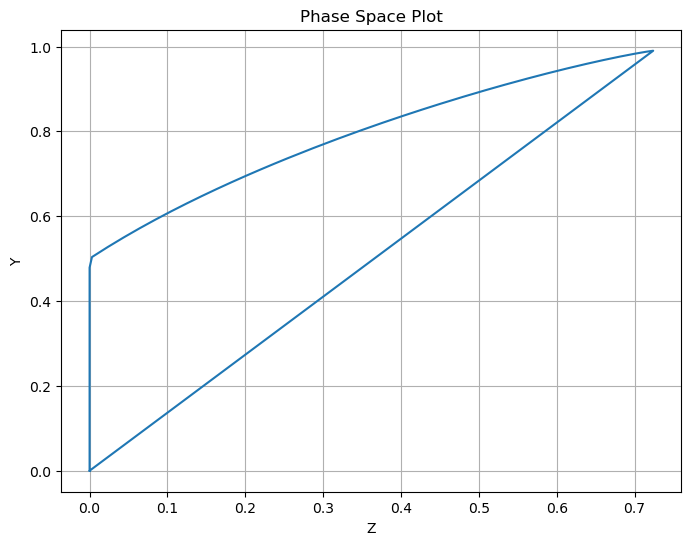

In [33]:
plt.figure(figsize=(8, 6))
plt.plot(Z, Y)
plt.xlabel('Z')
plt.ylabel('Y')
plt.title('Phase Space Plot')
plt.grid(True)
plt.show()

In [54]:
@pn.depends(
    beta_y_slider.param.value,
    k_xy_slider.param.value,
    alpha_y_slider.param.value,
    beta_z_slider.param.value,
    k_xz_slider.param.value,
    k_yz_slider.param.value,
    alpha_z_slider.param.value,
    h_slider.param.value,
    type_slider.param.value,
    logic_selector.param.value,
)
def plot_phase_space(
    by,
    kxy,
    ay,
    bz,
    kxz,
    kyz,
    az,
    h,
    type,
    logic,
    # t_end=50,
    # duration=20,
    # threshold_y=0.5,
):
    para = [by, kxy, ay, bz, kxz, kyz, az, h, type, logic]
    t_end = 50
    duration = 20
    threshold_y = 0.5
    time, X, Y, Z = feedforward_loop_scipy(t_end, para, duration, threshold_y)
    if type <= 4:
        title = f"C{type}-FFL"
    else:
        title = f"I{type-4}-FFL"
    p = figure(
        tools="pan,box_zoom,reset,save",
        y_axis_type="linear",
        y_range=[0, 1],
        title=f"Phase space for Z to Y",
        x_axis_label="Y",
        y_axis_label="Z",
    )

    p.line(Y, Z, legend_label="space", line_width=2.2, line_color=colors[0])

    return p


In [55]:
pn.Column(
    plot_phase_space,
    pn.Spacer(width=10),
    pn.Row(sliders, pn.Spacer(width=10)),
)

BokehModel(combine_events=True, render_bundle={'docs_json': {'96503242-3ebc-4529-86f7-a3f66b4f85ce': {'defs': …

In [54]:
p = figure(
        tools="pan,box_zoom,reset,save",
        y_axis_type="linear",
        y_range=[0, 1],
        title=f"Phase space for Z to Y",
        x_axis_label="Y",
        y_axis_label="Z",
    )

p.line(Y, Z, legend_label="space", line_width=2.2, line_color=colors[0])
show(p)

In [6]:
def echo_input(input_text):
    return f'You entered: {input_text}'

# Define the widget
text_input = pn.widgets.TextInput(name='Enter some text:', value='')

# Link the widget to the function
output = text_input.param.watch_values(echo_input, 'value')

# Display the widget and the output
pn.Row(text_input, output).servable()

BokehModel(combine_events=True, render_bundle={'docs_json': {'3e7434d8-5cf2-4541-81b8-bbf4a5cc13d4': {'defs': …